---
## Setup

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, HTML

# Import algorithms separately
from src.gbfs_knapsack import solve_knapsack_gbfs
from src.bpso_knapsack import solve_knapsack_bpso
from src.dp_knapsack import solve_knapsack_dp
from src.test_case_loader import TestCaseLoader
from src.advanced_visualizer import AdvancedKnapsackVisualizer

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✅ Setup complete")

✅ Setup complete


---
# PHẦN 1: SO SÁNH TRÊN 1 TEST CASE

## 1.1. Chạy các thuật toán

In [2]:
# Load test case
loader = TestCaseLoader()
test_case = loader.load_test_case('Size Medium 50')

print(f"📦 Test Case: {test_case['test_case_name']}")
print(f"   Items: {len(test_case['items'])}")
print(f"   Capacity: {test_case['capacity']}\n")

# Run algorithms
n_runs = 5
results_comparison = {
    'GBFS': [],
    'BPSO': [],
    'DP': []
}

print("🔬 Running algorithms...\n")

# GBFS
print("Running GBFS (5 runs)...")
for _ in range(n_runs):
    result = solve_knapsack_gbfs(
        test_case['items'], test_case['weights'], 
        test_case['values'], test_case['capacity'],
        max_states=5000
    )
    results_comparison['GBFS'].append(result)
print(f"  ✓ Mean value: {np.mean([r['total_value'] for r in results_comparison['GBFS']]):.1f}\n")

# BPSO
print("Running BPSO (5 runs)...")
for _ in range(n_runs):
    result = solve_knapsack_bpso(
        test_case['items'],
        test_case['weights'], 
        test_case['values'],
        test_case['capacity'],
        n_particles=30, max_iterations=100
    )
    results_comparison['BPSO'].append(result)
print(f"  ✓ Mean value: {np.mean([r['total_value'] for r in results_comparison['BPSO']]):.1f}\n")

# DP (deterministic - 1 run)
print("Running DP...")
result = solve_knapsack_dp(
    test_case['items'], test_case['weights'], 
    test_case['values'], test_case['capacity']
)
results_comparison['DP'] = [result]
print(f"  ✓ Optimal value: {result['total_value']:.1f}\n")

FileNotFoundError: ⚠️  Summary file not found at data/test_cases/test_cases_summary.csv
Please run: python src/data_generator.py

## 1.2. Phân tích kết quả

In [3]:
# Run all algorithms 30 times on Size_Medium_50
results_comparison = {
    'GBFS': [],
    'BPSO': [],
    'DP': []
}

for i in range(30):
    # GBFS
    gbfs_result = solve_knapsack_gbfs(
        test_case['items'],
        test_case['weights'],
        test_case['values'],
        test_case['capacity'],
        max_states=5000
    )
    results_comparison['GBFS'].append(gbfs_result)
    
    # BPSO
    bpso_result = solve_knapsack_bpso(
        test_case['items'],
        test_case['weights'],
        test_case['values'],
        test_case['capacity'],
        n_particles=30,
        max_iterations=100
    )
    results_comparison['BPSO'].append(bpso_result)
    
    # DP
    dp_result = solve_knapsack_dp(
        test_case['items'],
        test_case['weights'],
        test_case['values'],
        test_case['capacity']
    )
    results_comparison['DP'].append(dp_result)
    
    print(f"Completed run {i+1}/30")

# Calculate statistics
comparison_stats = []

for algo_name, runs in results_comparison.items():
    values = [r['total_value'] for r in runs]
    times = [r['execution_time'] for r in runs]
    weights = [r['total_weight'] for r in runs]
    
    comparison_stats.append({
        'Algorithm': algo_name,
        'Mean Value': np.mean(values),
        'Std Value': np.std(values),
        'Best Value': np.max(values),
        'Worst Value': np.min(values),
        'Mean Time (s)': np.mean(times),
        'Std Time (s)': np.std(times),
        'Mean Weight': np.mean(weights),
        'Capacity Used (%)': (np.mean(weights) / test_case['capacity']) * 100
    })

df_comparison = pd.DataFrame(comparison_stats)

# Add optimality gap
optimal_value = results_comparison['DP'][0]['total_value']
df_comparison['Gap to Optimal (%)'] = ((optimal_value - df_comparison['Mean Value']) / optimal_value) * 100

display(df_comparison)

NameError: name 'test_case' is not defined

## 1.3. Trực quan hóa

NameError: name 'test_case' is not defined

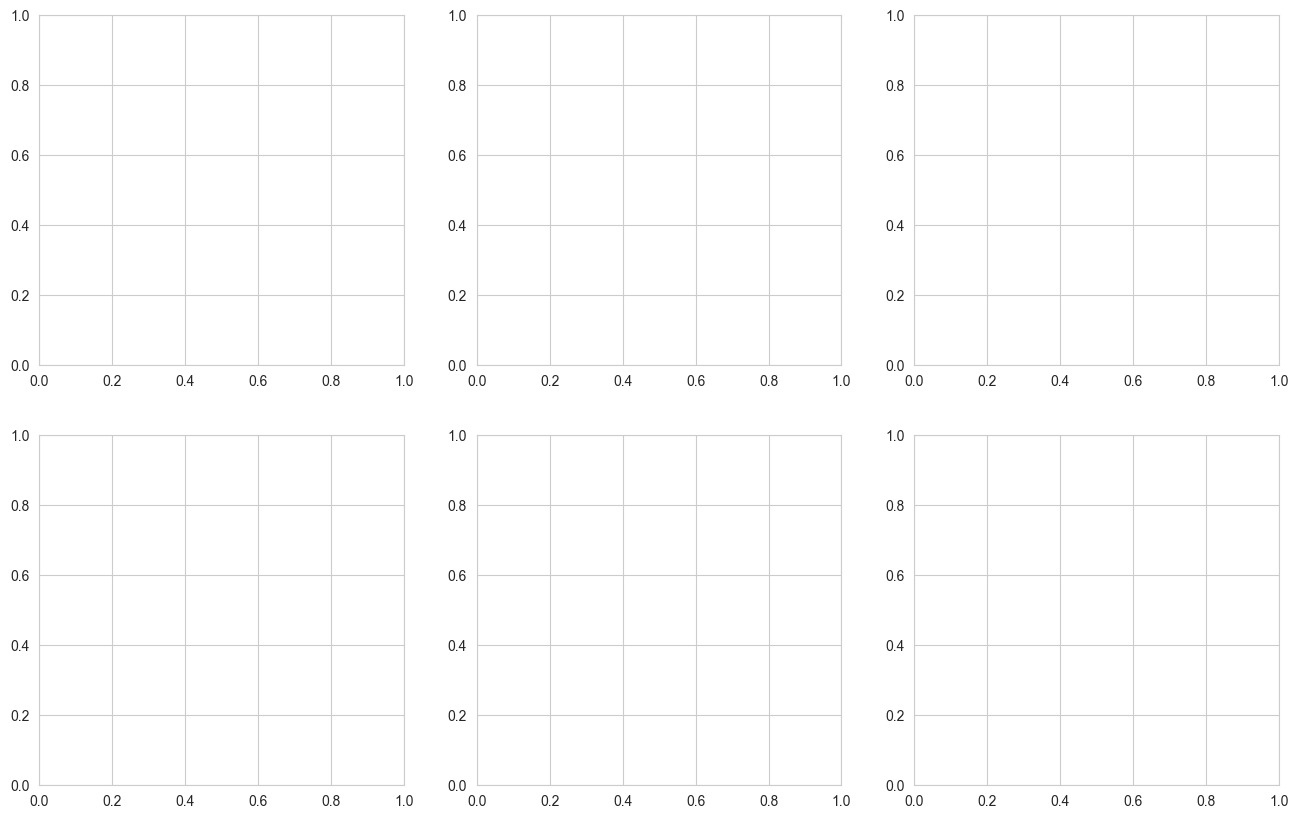

In [4]:
# Create detailed comparison chart
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle(f'Algorithm Comparison: {test_case["test_case_name"]}', fontsize=14, fontweight='bold')

algorithms = list(results_comparison.keys())
colors = {'GBFS': '#2E86AB', 'BPSO': '#A23B72', 'DP': '#F18F01'}

# 1. Solution Value
ax = axes[0, 0]
for algo in algorithms:
    values = [r['total_value'] for r in results_comparison[algo]]
    ax.scatter([algo]*len(values), values, alpha=0.6, s=100, color=colors[algo])
    ax.plot([algo], [np.mean(values)], 'D', markersize=15, 
            color=colors[algo], markeredgecolor='black', markeredgewidth=2)
ax.set_ylabel('Solution Value')
ax.set_title('Solution Quality')
ax.grid(True, alpha=0.3)

# 2. Execution Time
ax = axes[0, 1]
for algo in algorithms:
    times = [r['execution_time'] for r in results_comparison[algo]]
    ax.scatter([algo]*len(times), times, alpha=0.6, s=100, color=colors[algo])
    ax.plot([algo], [np.mean(times)], 'D', markersize=15,
            color=colors[algo], markeredgecolor='black', markeredgewidth=2)
ax.set_ylabel('Time (s)')
ax.set_title('Execution Time')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)

# 3. Gap to Optimal
ax = axes[0, 2]
gaps = df_comparison[df_comparison['Algorithm'] != 'DP']['Gap to Optimal (%)']
gap_algos = df_comparison[df_comparison['Algorithm'] != 'DP']['Algorithm']
bars = ax.bar(gap_algos, gaps, color=[colors[a] for a in gap_algos], alpha=0.7, edgecolor='black')
ax.set_ylabel('Gap to Optimal (%)')
ax.set_title('Optimality Gap')
ax.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Capacity Utilization
ax = axes[1, 0]
util = df_comparison['Capacity Used (%)']
bars = ax.bar(algorithms, util, color=[colors[a] for a in algorithms], alpha=0.7, edgecolor='black')
ax.axhline(y=100, color='red', linestyle='--', label='Max Capacity')
ax.set_ylabel('Capacity Used (%)')
ax.set_title('Capacity Utilization')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# 5. Value vs Time scatter
ax = axes[1, 1]
for algo in algorithms:
    values = [r['total_value'] for r in results_comparison[algo]]
    times = [r['execution_time'] for r in results_comparison[algo]]
    ax.scatter(times, values, s=150, alpha=0.7, label=algo, color=colors[algo], edgecolors='black', linewidths=1.5)
ax.set_xlabel('Execution Time (s)')
ax.set_ylabel('Solution Value')
ax.set_title('Quality vs Speed')
ax.set_xscale('log')
ax.legend()
ax.grid(True, alpha=0.3)

# 6. Statistics table
ax = axes[1, 2]
ax.axis('off')
table_data = []
for _, row in df_comparison.iterrows():
    table_data.append([
        row['Algorithm'],
        f"{row['Mean Value']:.0f}",
        f"{row['Mean Time (s)']:.4f}",
        f"{row['Gap to Optimal (%)']:.2f}" if row['Algorithm'] != 'DP' else '-'
    ])
table = ax.table(cellText=table_data,
                colLabels=['Algorithm', 'Value', 'Time (s)', 'Gap (%)'],
                cellLoc='center', loc='center',
                colColours=['lightgray']*4)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.savefig('../results/chapter3/3_1_2_comparison_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.4. Nhận xét

**GBFS:**
- Chất lượng nghiệm: ...
- Thời gian thực thi: ...
- Gap so với optimal: ...

**BPSO:**
- Chất lượng nghiệm: ...
- Thời gian thực thi: ...
- Gap so với optimal: ...

**DP:**
- Luôn tìm được nghiệm tối ưu
- Thời gian: ...

---
# PHẦN 2: SO SÁNH TRÊN NHIỀU TEST CASES

## 2.1. Chạy trên tất cả test cases

In [5]:
# Get all test cases
all_test_cases = loader.list_test_cases()

print(f"📦 Testing on {len(all_test_cases)} test cases...\n")

all_results = []

for tc_name in all_test_cases[:5]:  # First 5 for quick demo
    print(f"Testing: {tc_name}")
    tc = loader.load_test_case(tc_name)
    
    # Run each algorithm
    gbfs_result = solve_knapsack_gbfs(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        max_states=5000
    )
    
    bpso_result = solve_knapsack_bpso(
        tc['values'], tc['weights'], tc['capacity'],
        n_particles=30, max_iterations=100
    )
    
    dp_result = solve_knapsack_dp(
        tc['items'], tc['weights'], tc['values'], tc['capacity']
    )
    
    all_results.append({
        'Test Case': tc_name,
        'Items': len(tc['items']),
        'Capacity': tc['capacity'],
        'GBFS Value': gbfs_result['total_value'],
        'GBFS Time': gbfs_result['execution_time'],
        'BPSO Value': bpso_result['total_value'],
        'BPSO Time': bpso_result['execution_time'],
        'DP Value': dp_result['total_value'],
        'DP Time': dp_result['execution_time']
    })
    
    print(f"  ✓ GBFS: {gbfs_result['total_value']:.0f}")
    print(f"  ✓ BPSO: {bpso_result['total_value']:.0f}")
    print(f"  ✓ DP: {dp_result['total_value']:.0f}\n")

df_all = pd.DataFrame(all_results)

# Calculate gaps
df_all['GBFS Gap (%)'] = ((df_all['DP Value'] - df_all['GBFS Value']) / df_all['DP Value']) * 100
df_all['BPSO Gap (%)'] = ((df_all['DP Value'] - df_all['BPSO Value']) / df_all['DP Value']) * 100

display(df_all)

NameError: name 'loader' is not defined

## 2.2. Visualization

NameError: name 'df_all' is not defined

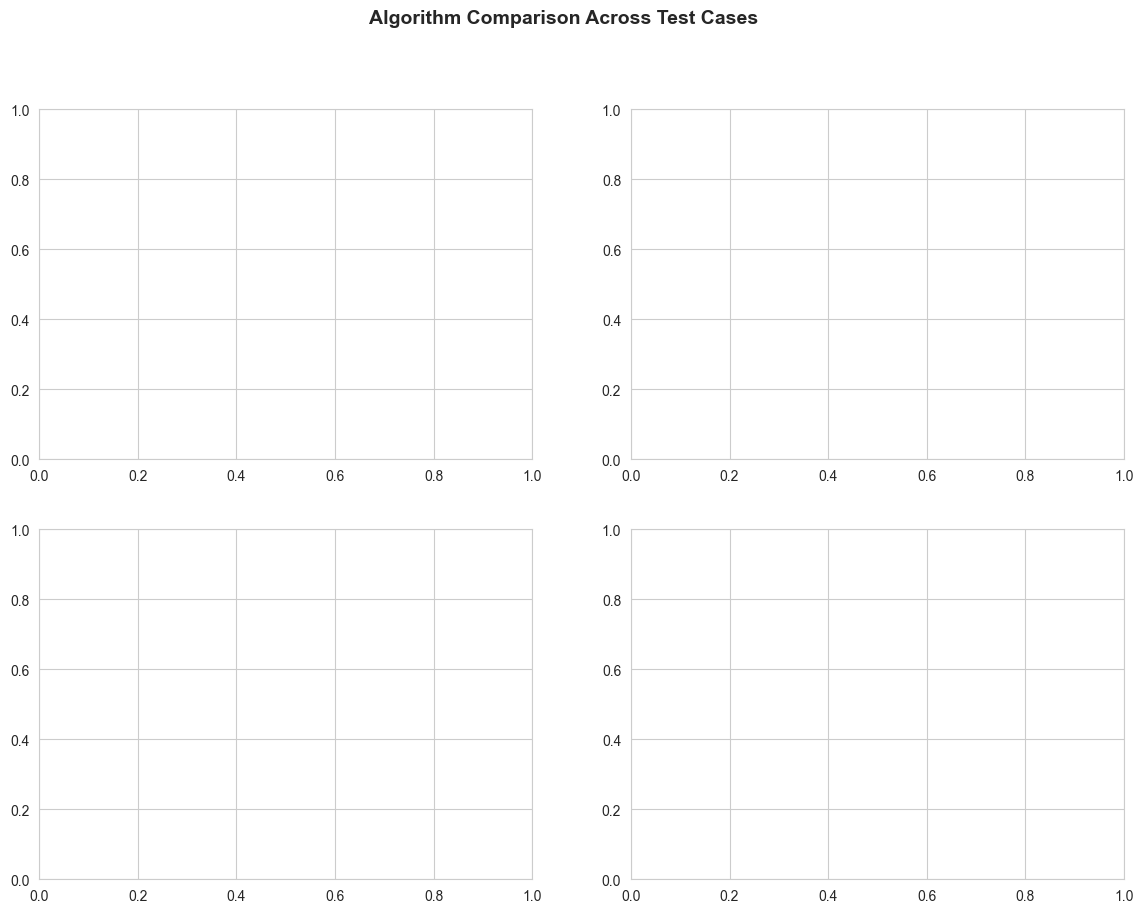

In [6]:
# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Algorithm Comparison Across Test Cases', fontsize=14, fontweight='bold')

# 1. Solution values
ax = axes[0, 0]
x = np.arange(len(df_all))
width = 0.25
ax.bar(x - width, df_all['GBFS Value'], width, label='GBFS', alpha=0.8)
ax.bar(x, df_all['BPSO Value'], width, label='BPSO', alpha=0.8)
ax.bar(x + width, df_all['DP Value'], width, label='DP', alpha=0.8)
ax.set_xlabel('Test Case')
ax.set_ylabel('Solution Value')
ax.set_title('Solution Quality')
ax.set_xticks(x)
ax.set_xticklabels(df_all['Test Case'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 2. Execution times
ax = axes[0, 1]
ax.bar(x - width, df_all['GBFS Time'], width, label='GBFS', alpha=0.8)
ax.bar(x, df_all['BPSO Time'], width, label='BPSO', alpha=0.8)
ax.bar(x + width, df_all['DP Time'], width, label='DP', alpha=0.8)
ax.set_xlabel('Test Case')
ax.set_ylabel('Time (s)')
ax.set_title('Execution Time')
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(df_all['Test Case'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 3. Optimality gaps
ax = axes[1, 0]
ax.bar(x - width/2, df_all['GBFS Gap (%)'], width, label='GBFS', alpha=0.8)
ax.bar(x + width/2, df_all['BPSO Gap (%)'], width, label='BPSO', alpha=0.8)
ax.set_xlabel('Test Case')
ax.set_ylabel('Gap to Optimal (%)')
ax.set_title('Optimality Gap')
ax.set_xticks(x)
ax.set_xticklabels(df_all['Test Case'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 4. Summary statistics
ax = axes[1, 1]
ax.axis('off')
summary_data = [
    ['GBFS', f"{df_all['GBFS Gap (%)'].mean():.2f}%", f"{df_all['GBFS Time'].mean():.4f}s"],
    ['BPSO', f"{df_all['BPSO Gap (%)'].mean():.2f}%", f"{df_all['BPSO Time'].mean():.4f}s"],
    ['DP', '0.00%', f"{df_all['DP Time'].mean():.4f}s"]
]
table = ax.table(cellText=summary_data,
                colLabels=['Algorithm', 'Avg Gap', 'Avg Time'],
                cellLoc='center', loc='center',
                colColours=['lightgray']*3)
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)
ax.set_title('Average Performance', pad=20, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/chapter3/3_1_2_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()

---
# KẾT LUẬN

## So sánh tổng quan:

| Thuật toán | Ưu điểm | Nhược điểm | Khi nào nên dùng |
|------------|---------|------------|------------------|
| **GBFS** | - Tìm kiếm có hướng<br>- Dễ implement | - Không đảm bảo optimal<br>- Phụ thuộc heuristic | Cần nghiệm tốt nhanh, có heuristic tốt |
| **BPSO** | - Exploration tốt<br>- Không cần heuristic | - Stochastic<br>- Nhiều tham số | Bài toán phức tạp, không có heuristic |
| **DP** | - Luôn optimal<br>- Deterministic | - Tốn bộ nhớ<br>- Chậm với n lớn | Cần nghiệm tối ưu, n và capacity vừa phải |

## Insights:
1. **Gap to optimal**: GBFS và BPSO có gap khoảng ... %
2. **Speed**: BPSO nhanh nhất, DP chậm nhất
3. **Consistency**: DP deterministic, GBFS/BPSO có variance

## Khuyến nghị:
- Sử dụng DP khi: ...
- Sử dụng GBFS khi: ...
- Sử dụng BPSO khi: ...